#  Project 2: Harris Corner Detection and Matching

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from utils import plotFigureGray, plotFigure
from student_code import harris_corners, get_keypoints, get_features

## Open Two images for matching. Convert them into grayscale
### Take two similar images and add the photos to folder data. Rename these images as img1.jpg, and img2.jpg

In [2]:
img1_orig = cv2.imread('../data/plane.bmp')
img2_orig = cv2.imread('../data/plane_mirror.bmp')


img1= np.float32(cv2.cvtColor(img1_orig,cv2.COLOR_BGR2GRAY))
img2= np.float32(cv2.cvtColor(img2_orig,cv2.COLOR_BGR2GRAY))



# Get Harris Corners, normalize the corner values between 0 and 255. 

In [3]:
corners1, Ix1, Iy1 = harris_corners(img1, window_size=3, alpha=0.04, threshold=1e-3, nms_size=5)
corners2, Ix2, Iy2 = harris_corners(img2, window_size=3, alpha=0.04, threshold=1e-3, nms_size=5)

corners1 = cv2.normalize(corners1, corners1, alpha=0, beta=255,
                       norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
corners2 = cv2.normalize(corners2, corners2, alpha=0, beta=255,
                       norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)




# Set the threshold for corners and generate key points from these corners

In [5]:
threshold = 40
kp1 = get_keypoints(corners1, Ix1, Iy1, threshold)
kp2 = get_keypoints(corners2, Ix2, Iy2, threshold)

# Draw the key points. The line (radius) depicts the gradient

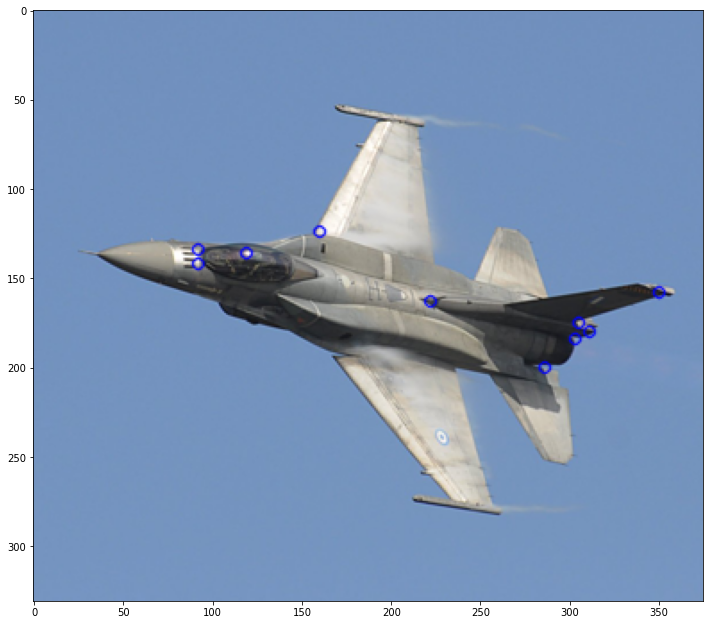

In [7]:
cv2.drawKeypoints(img1_orig, kp1, img1_orig, color=(255,0,0))
                         
plotFigure(img1_orig,12)
plt.show()   

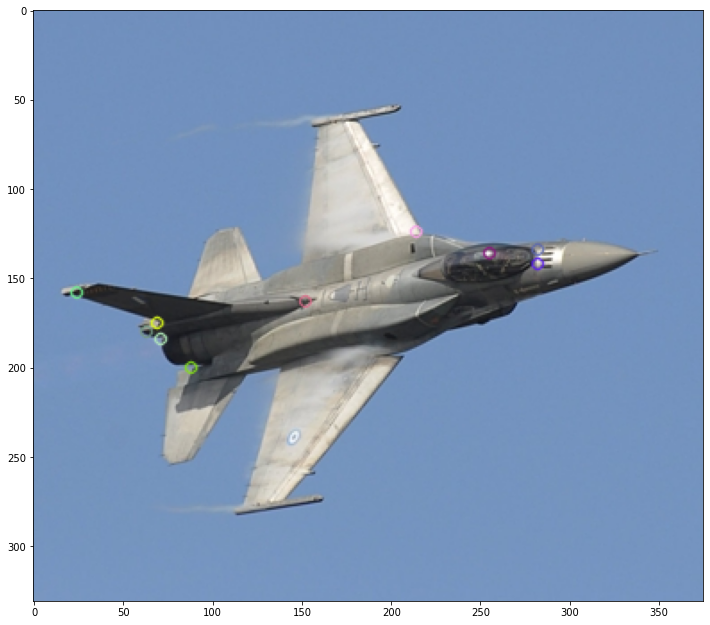

In [9]:
cv2.drawKeypoints(img2_orig, kp2, img2_orig,)
plotFigure(img2_orig,12)
plt.show()   

# From these key points, generate ORB descriptors. Then match these descriptors



In [10]:
orb = cv2.ORB_create()

# create sift instance
# sift = cv2.xfeatures2d.SIFT_create()
# get descriptors
descriptors1 = orb.compute(img1_orig, kp1)[1]
descriptors2 = orb.compute(img2_orig, kp2)[1]




In [11]:
print(descriptors1)

[[  2   7   2 143  17  66 182  32  60  12  75   5 204  34  38 196 240  77
  131 227 100 144   1 207  37  54 138   3  16 118  61 198]
 [189   8  66  58  78 133 194  80 214  64 225  79  51 200  51 137 104 162
    2 143 175  43  30  63  18  11 144  24 125 142 120 136]
 [ 89  67  70  40  40 136  65  20 228  17  10 224  19 128 176 122  34   0
  108  92 207  33   6  17 192 168  32  72 125 130 122   0]
 [249 170 199 120  14 129  72  87 198  19 176 222  51 129 240 187 107 162
  108 140 219 111 198  17 144 137 240 184 127 136 242  40]
 [183  98 228 154 204 177 200 205 199  85 144 159   1 200 255  11  75 138
   23 157 142 103 238 240  90   9 223 253 181 157 240 196]
 [ 10 206  34   5  81  90 182  39  61   4  78   1 236  46   6 212 176  93
  131  33  36 152   1 207  39 119  10  67   2  36  13 206]
 [  7   1 188 133 228  38 191 188  28 210  94 199 221  43 159  75 223  71
   63 255 145 240  93 200 108  63 239 196 140 255 177 209]
 [  6 147  20 133  19  30 178 168  60   8  75 165 204  30  14 196 180

In [12]:

# get matches
bfm = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bfm.match(descriptors1, descriptors2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = np.array([])

img3 = cv2.drawMatches(img1_orig,kp1,img2_orig,kp2,matches[:10], img3, flags=2)



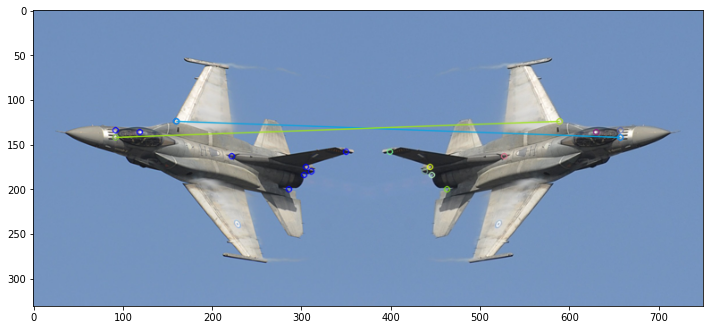

True

In [13]:
plotFigure(img3,12)
plt.show() 
cv2.imwrite('../results/blox_matched.png', img3)


## Custom SIFT descriptor

In [14]:
import math

In [17]:
descriptors1 = get_features(img1, kp1, 16)
descriptors2 = get_features(img2, kp2, 16)

UnboundLocalError: local variable 'x' referenced before assignment

In [ ]:
descriptors1 = np.float32(descriptors1)
descriptors2 = np.float32(descriptors2)

# get matches
bfm = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bfm.match(descriptors1, descriptors2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = np.array([])

img3 = cv2.drawMatches(img1_orig,kp1,img2_orig,kp2,matches[:10], img3, flags=2)





In [ ]:
plotFigure(img3,12)
plt.show() 
cv2.imwrite('../results/matched_SIFT.png', img3)
